In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from adb_helper import ADB
from envs_helper import setup_mobile_env, delete_mobile_envs, setup_host_env
from snpe_utils import SnpeArray, SnpeModel, OnnxConverter
from labels import imagenet_labels

### Lib

In [ ]:
#Please download alexnet.onnx from : https://drive.google.com/file/d/1BUy1y21huEtmfdnVJwo-rdv9NusXvzT9/view?usp=sharing

In [2]:
mobile_arch = "arm-android-clang8.0"
host_snpe = "/home/xxx/snpe-1.64.0_3605/snpe-1.64.0.3605/"
adbkey_path = "/home/xxx/.android/"
model_path = "./alexnet.onnx"

### Setup Env

In [3]:
delete_mobile_envs(adbkey_path)
setup_mobile_env(host_snpe, adbkey_path)
setup_host_env()

### Onnx model to DLC model

In [4]:
converter = OnnxConverter(model_path, host_snpe)
model = converter.onnx_to_dlc()
model.upload_model(adbkey_path=adbkey_path)

### Input

In [5]:
inp = cv2.imread("./cat.jpeg").astype("float32")/255.
inp = np.ascontiguousarray(cv2.resize(inp[:,:,::-1],(224,224))[None])

In [6]:
inputs = ['input.1',inp]
inp_array = SnpeArray(inputs, mobile=True)

### Inference

In [7]:
df,output = model(inp_array, 'gpu', profile=True)

LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/data/local/tmp/snpe/lib:/system/vendor/lib/ PATH=$PATH:/data/local/tmp/snpe/bin ADSP_LIBRARY_PATH="/data/local/tmp/snpe/dsp/lib;/system/lib/rfsa/adsp;/system/vendor/lib/rfsa/adsp;/dsp" snpe-net-run --container /data/local/tmp/snpe/models/model.dlc --input_list /data/local/tmp/snpe/inputs/inputs.txt --output_dir /data/local/tmp/snpe/outputs/ --use_gpu --gpu_mode=float16


### Profile

In [8]:
df

,timestamp,message,idx,time,runtime
18,15776295627,FORWARD_PROPAGATE_LAYER,0,0,GPU
19,15776295627,FORWARD_PROPAGATE_LAYER,1,479,GPU
20,15776295627,FORWARD_PROPAGATE_LAYER,2,0,GPU
21,15776295627,FORWARD_PROPAGATE_LAYER,3,16,GPU
22,15776295627,FORWARD_PROPAGATE_LAYER,4,372,GPU
23,15776295627,FORWARD_PROPAGATE_LAYER,5,0,GPU
24,15776295627,FORWARD_PROPAGATE_LAYER,6,18,GPU
25,15776295627,FORWARD_PROPAGATE_LAYER,7,367,GPU
26,15776295627,FORWARD_PROPAGATE_LAYER,8,0,GPU
27,15776295627,FORWARD_PROPAGATE_LAYER,9,488,GPU


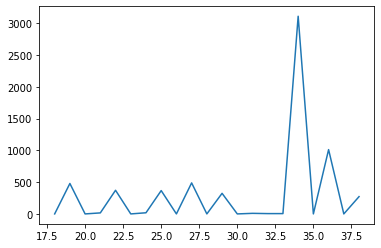

In [9]:
plt.plot(df['time'])

### Output

In [10]:
out = output['36'][0].argsort()[::-1][:5]

In [11]:
print([imagenet_labels[x] for x in out])

['Egyptian cat', 'Sealyham terrier, Sealyham', 'bassinet', 'studio couch, day bed', 'West Highland white terrier']
